(00:pandas_tutorial)=
# Pandas

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams

# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})

## Basic Usage

Iris data is one of the typical statistical sample used by statisticians. See [this wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Mature_flower_diagram.svg/1920px-Mature_flower_diagram.svg.png)

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print(f"{type(iris) = }")

type(iris) = <class 'pandas.core.frame.DataFrame'>


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail(6)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


You can save by ``.to_csv()``, print to html by ``to_html()``, convert to numpy by ``.to_numpy()``, etc:

In [6]:
# iris.to_csv("iris_data.csv")
# iris.to_html()
# iris.to_numpy()

## Selection of Columns and Rows

If you select a column or a row, it now becomes ``pandas.Series``, not ``DataFrame``:

In [7]:
sep_len = iris["sepal_length"]

print(type(sep_len))
sep_len.head()

<class 'pandas.core.series.Series'>


0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

Convert to numpy:

In [8]:
sep_len.to_numpy()  
# Identical to sep_len.values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## Selecting Elements (``.loc`` and ``.iloc``)
Two major ways to select elements:

* ``loc`` is used when you want to use column name and row index
  * ``.loc[column, i]``, such as ``iris.loc["sepal_length", 0]``
* ``iloc`` is used when you want to use integer indexing
  * ``.iloc[i, j]``, such as ``iris.iloc[0, 1]`` or ``iris.iloc[-1]``

In [9]:
# To select only one:
print(f"{iris.iloc[0, 1]            = }")
print(f"{iris.loc[0, 'sepal_width'] = }")

iris.iloc[0, 1]            = 3.5
iris.loc[0, 'sepal_width'] = 3.5


In [10]:
# Select a row by iloc
iris.iloc[0, :]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [11]:
# Select a row by loc:
iris.loc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [12]:
row_0 = iris.iloc[0]

print(type(row_0))
row_0

<class 'pandas.core.series.Series'>


sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

And when converting the `Series` obejct to `numpy.ndarray`:

In [13]:
iris["petal_length"].values

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

## Selecting by Conditions
When making a new DataFrame using a subset of the columns of an existing DataFrame:

In [14]:
iris2 = iris.loc[iris["species"] == "versicolor"].copy()
# I always recommend you to use .copy() at the end, if you don't know what it means.
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [15]:
iris2 = iris.loc[(iris["petal_length"] > 5) & (iris["species"] == "versicolor")].copy()
# I always recommend you to use .copy() at the end, if you don't know what it means.
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,versicolor


Note that you have to use parentheses like ``.loc[(condition1) & (condition2)]``.

## Iterate through the DataFrame

In the example below, I tried to add a column named "test" while iterating through the rows:

In [16]:
for i, row in iris.iterrows():
    if i == 0:
        print(i)
        print(row)
        row["test"] = 999
        print()
        print(row)


0
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
test               999
Name: 0, dtype: object


In [17]:
print(iris.iloc[0])
# Note that it is not changed!

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


How do we modify them actually?

A **not working** example:

In [18]:
# Initialize
iris["test"] = None
for i, row in iris.iterrows():
    row.loc["test"] = row["sepal_length"] + row["petal_length"]

Here, ``row`` is just a copy of the original DataFrame. So nothing is changed in ``iris``:

In [19]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,test
0,5.1,3.5,1.4,0.2,setosa,None


A **working** example:

You need to directly access to the original DataFrame:

In [20]:
# Initialize
iris["test"] = None
for i, row in iris.iterrows():
    iris.at[i, "test"] = row["sepal_length"] + row["petal_length"]

In [21]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,test
0,5.1,3.5,1.4,0.2,setosa,6.5


Things go well in this case with ``loc``, but I used ``at``.
* ``loc`` is slower, but you can access to multiple locations
* ``at`` is quicker, but you can access to only one single location

See [here](https://stackoverflow.com/questions/37216485/pandas-at-versus-loc)

A **working and good** example for this specific case:

But in this kind of simple summation case, you can just do

In [22]:
iris["test"] = iris["sepal_length"] + iris["petal_length"]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,test
0,5.1,3.5,1.4,0.2,setosa,6.5


**You don't even need that initialization.**

The iteration is useful when you do some complicated jobs:

In [23]:
# Initialize
iris["test"] = None
for i, row in iris.iterrows():
    length_sum = row["sepal_length"] + row["petal_length"]
    if length_sum > 0.1:
        length_sum = 0.1
    iris.at[i, "test"] = length_sum

## Drop

pandas usually generate annoying index (``0, 1, ..., N``) columns etc. You can drop them by

In [24]:
iris = iris.drop(columns=["test"])

iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


NaN's can be removed by ``.dropna()``:

In [25]:
iris_nan = iris.copy()
iris_nan.iloc[:2] = None
iris_nan.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,None
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
iris_nan = iris_nan.dropna()
iris_nan.head()  # try .reset_index() by yourself

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


In [27]:
iris_nan.reset_index().head()

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,2,4.7,3.2,1.3,0.2,setosa
1,3,4.6,3.1,1.5,0.2,setosa
2,4,5.0,3.6,1.4,0.2,setosa
3,5,5.4,3.9,1.7,0.4,setosa
4,6,4.6,3.4,1.4,0.3,setosa


In [28]:
iris_nan.reset_index(drop=True).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.7,3.2,1.3,0.2,setosa
1,4.6,3.1,1.5,0.2,setosa
2,5.0,3.6,1.4,0.2,setosa
3,5.4,3.9,1.7,0.4,setosa
4,4.6,3.4,1.4,0.3,setosa


In [29]:
# iris_nan.to_csv("test.csv", index=False)

## Sorting

In [30]:
iris.sort_values(by=["sepal_width", "petal_length"]).head()

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor
62,6.0,2.2,4.0,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor
119,6.0,2.2,5.0,1.5,virginica
41,4.5,2.3,1.3,0.3,setosa


As can be seen, the index numbers are kept but "ordered" based on the column.

Reset it:

In [31]:
iris_sort = (iris.sort_values(by="sepal_width")
             .reset_index(drop=True)
)
iris_sort.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,2.0,3.5,1.0,versicolor
1,6.0,2.2,4.0,1.0,versicolor
2,6.0,2.2,5.0,1.5,virginica
3,6.2,2.2,4.5,1.5,versicolor
4,4.5,2.3,1.3,0.3,setosa


See what happens if ``drop = False``.

## Grouping

Grouping is one of the most useful functionality of pandas. 

In [32]:
grouped = iris.groupby("species")

In [33]:
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [34]:
grouped.get_group("setosa").head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [35]:
for name, group in grouped:
    print(name)
    print(group.describe())
    print()

setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000  

## Masking and Special Operations

In [36]:
mask = iris["sepal_width"] < 3.3
iris.loc[mask].head()  # Try .reset_index() by yourself

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


There are many of the things you can do for ``str``, e.g., ``.split`` or ``.replace``, etc.

You can do that on all the ``str``s in a column without for loop in pandas:

In [37]:
setosa_mask = iris["species"].str.startswith("seto")
iris.loc[setosa_mask].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
iris["species"].str.replace("seto", "testingtesting").head()

0    testingtestingsa
1    testingtestingsa
2    testingtestingsa
3    testingtestingsa
4    testingtestingsa
Name: species, dtype: object

## A Simple Plotting

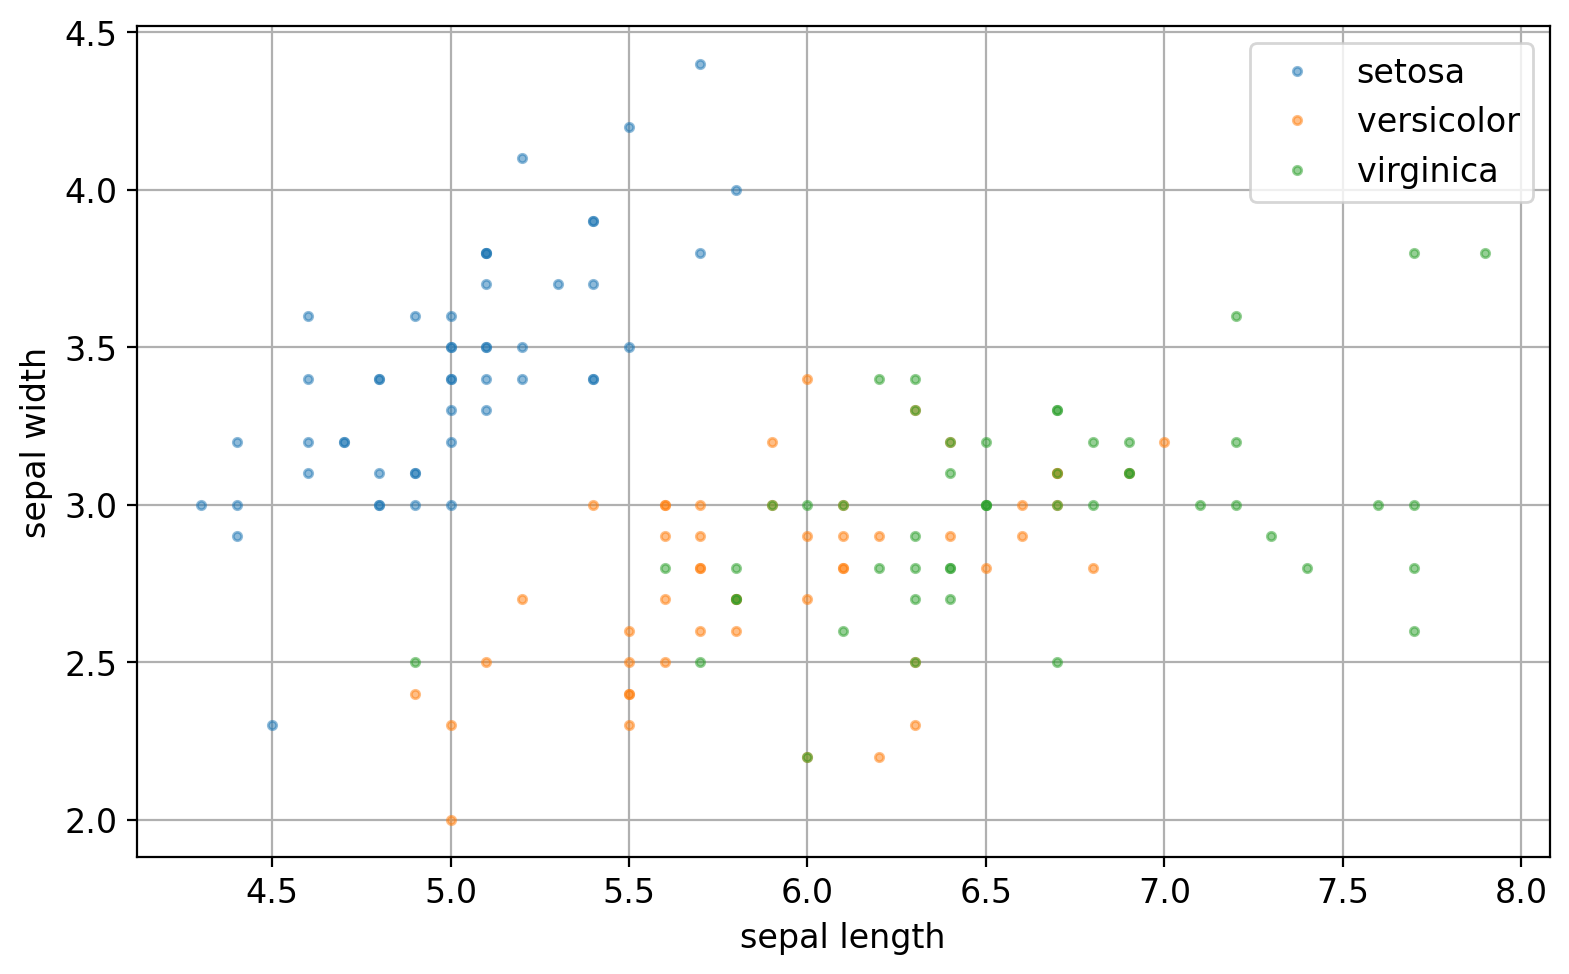

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=False, sharey=False, gridspec_kw=None)

for name, g in grouped:
    axs.plot(g["sepal_length"], g["sepal_width"], '.', alpha=0.5, label=name)
    
axs.legend(loc=1)
axs.grid()
axs.set(xlabel="sepal length", ylabel="sepal width")
plt.tight_layout()
plt.show()